# Obesity Predictor Model


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn import metrics


## Question and Background Information


Question: Can we predict obesity level for individuals in Mexico, Peru and Colombia based on an individual’s family history with being overweight?

Background Information: Obesity is a prominent issue in many countries. We wanted to focus on the countries of Mexico, Peru, and Colombia in search of predicting obesity based on factors specific to developing countries. The dataset we chose has 17 different attributes based on eating habits and physical condition. We have data on individuals ranging from 14 to 61 years old and a multitude of health conditions so the model would have to be able to form predictions considering the variance of the attributes. Using decision trees, we may be able to find patterns between specific variables and discern correlations to explain obesity trends in developing countries. For example, the ML model can read into family history and overall demographic which could potentially be used by researchers studying genetic factors relating to physical habits and obesity. Creating a machine learning model that can predict obesity levels can be used for understanding which factors are most relevant to address when addressing the obesity challenge. 


## Exploratory Data Analysis


In [2]:
obesity = pd.read_csv("ObesityDataSet.csv")
obesity.info()
obesity.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
# Display basic summary statistics
summary_stats = obesity.describe()
print(summary_stats)


               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

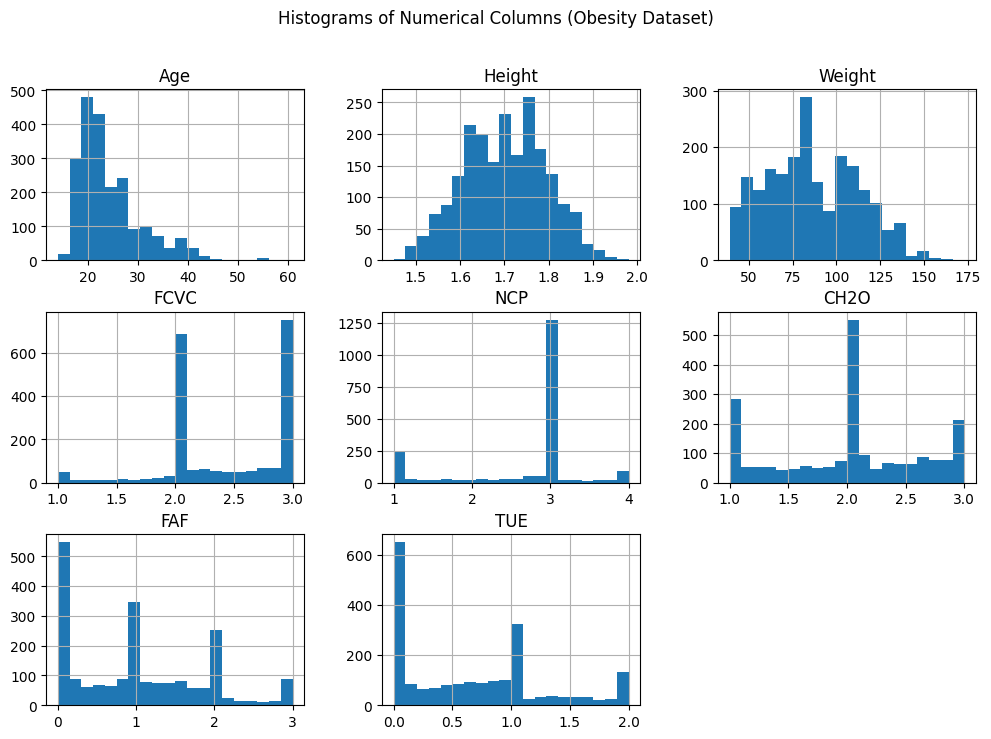

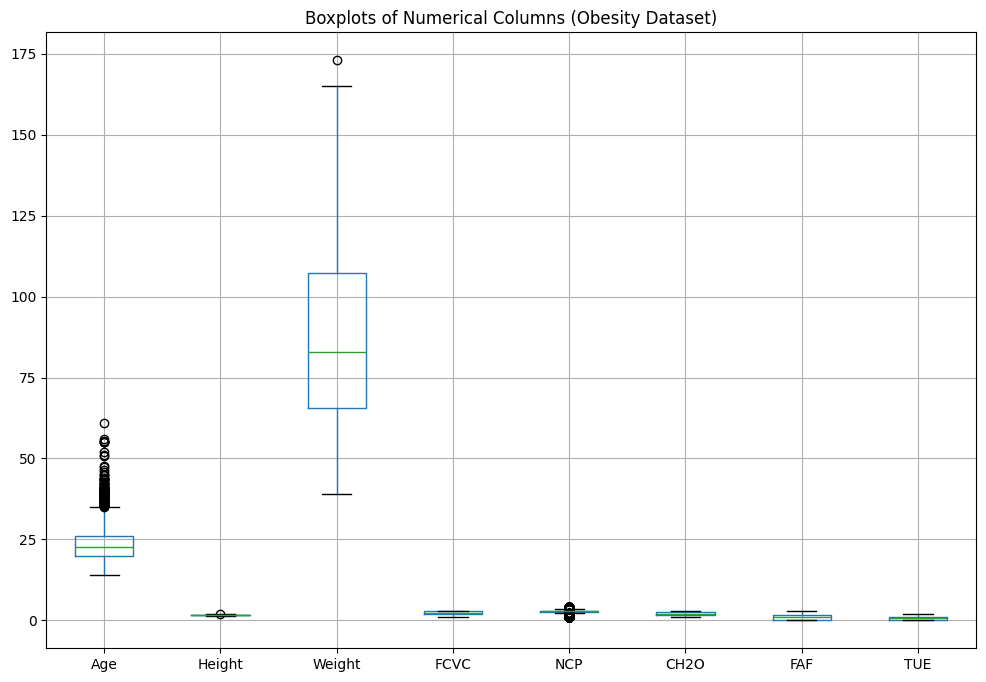

In [4]:
# Create histograms for numerical columns
obesity.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Numerical Columns (Obesity Dataset)')
plt.show()

# Create a boxplot for each numerical column
obesity.boxplot(figsize=(12, 8))
plt.title('Boxplots of Numerical Columns (Obesity Dataset)')
plt.show()


In [5]:
obesity.NObeyesdad.value_counts()   


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

## Methods

First, we want to collapse factor levels into overweight, obese, and normal weight.

In [73]:
# Define mapping for weight categories
#weight_mapping = {
    #'Overweight_Level_I': 'overweight',
    #'Overweight_Level_II': 'overweight',
    #'Obesity_Type_I': 'obese',
    #'Obesity_Type_II': 'obese'
#}

# Apply mapping to the 'NObeyesdad' column
#obesity['NObeyesdad'] = obesity['NObeyesdad'].map(weight_mapping).fillna('normal weight')

# Display updated value counts
#print(obesity['NObeyesdad'].value_counts())


Convert all object to category

In [5]:
# obesity.info()   # check the variables
cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC',
      'CALC', 'MTRANS', 'NObeyesdad']   # select the columns to convert
obesity[cat] = obesity[cat].astype('category')
obesity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   float64 
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   float64 
 7   NCP                             2111 non-null   float64 
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   float64 
 11  SCC                             2111 non-null   category
 12  FAF                 

Normalize and onehot encode

In [6]:
# Identify categorical columns
cat_cols = obesity.select_dtypes(include='category').columns

# One-hot encode all categorical columns
obesity = pd.get_dummies(obesity, columns=cat_cols)

# Display the new DataFrame with one-hot encoded columns
print(obesity.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           True   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           True   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0          False   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0          False   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0          False   

   Gender_Male  ...  MTRANS_Motorbike  MTRANS_Public_Transportation  \
0        False  ...             False                          True   
1        False  ...             False                          True   
2         True  ...             False                          True   
3         True  ...             False                         False   
4         True  ...             False                          True   

   MTRANS_Walking  NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
0           False                           False                      True   


Check prevalence

In [7]:
obesity['NObeyesdad_obese'].value_counts()[1] / obesity['NObeyesdad_obese'].count()

KeyError: 'NObeyesdad_obese'

In [96]:
#Next we are going to partition the data, but first we need to isolate the independent and dependent variables
X = obesity.drop(['NObeyesdad_obese'], axis=1).values  #independent variables
y = obesity['NObeyesdad_obese']                  #dependent variable


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, stratify = y, random_state=21)

In [98]:
X_tune, X_test, y_tune, y_test = train_test_split(X_test,y_test,  train_size = 0.50, stratify = y_test,random_state=49)

In [99]:
obesityknn = KNeighborsClassifier(n_neighbors=10)
#Now let's fit our knn model to the training data
obesityknn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [100]:
#This is how well our model does when applied to the tune set
obesityknn.score(X_tune, y_tune) #This is the probability that our model predicted the correct output based on given inputs, not bad...

0.9810725552050473

In [78]:
#X = obesity.drop(['NObeyesdad_obese'], axis=1).values   # independent variables
#y = obesity['NObeyesdad_obese'].values                  # dependent variable

#train, test = train_test_split(obesity,  test_size=0.4, stratify = obesity['NObeyesdad_obese']) 


In [79]:
#test, val = train_test_split(test, test_size=0.5, stratify=test['NObeyesdad_obese'])


In [80]:
#import random
#random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

#X_train = train.drop(['NObeyesdad_obese'], axis=1).values
#y_train = train['NObeyesdad_obese'].values

#neigh = KNeighborsClassifier(n_neighbors=9)
#neigh.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [81]:
# now, we check the model's accuracy on the test data:

#X_test = test.drop(['NObeyesdad_obese'], axis=1).values
#y_test = test['NObeyesdad_obese'].values

#neigh.score(X_test, y_test)


0.9786729857819905

In [82]:
# now, we test the accuracy on our validation data.

#X_val = val.drop(['NObeyesdad_obese'], axis=1).values
#y_val = val['NObeyesdad_obese'].values

#neigh.score(X_val, y_val)

0.9598108747044918

## Evaluation of model


In [101]:
#In order to take a look at other metrics, we first need to extract certain information from our model
#Let's retrieve the probabilities calculated from our tune set
obesity_prob1 = obesityknn.predict_proba(X_tune) #This function gives percent probability for both class (0,1)
obesity_prob1[:5] #both are important depending on our question, in this example we want the positive class


array([[0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2]])

In [102]:
#Now let's retrieve the predictions, based on the tuning set...
obesity_pred1 = obesityknn.predict(X_tune)
obesity_pred1[:5] #looks good, notice how the probabilities above correlate with the predictions below


array([ True, False, False,  True, False])

In [103]:
#Building a dataframe for simplicity, including everything we extracted and the target
final_model= pd.DataFrame({'neg_prob':obesity_prob1[:, 0], 'pred':obesity_pred1,'target':y_tune, 'pos_prob':obesity_prob1[:, 1]})
#Now everything is in one place!


In [104]:
final_model.head() #Nice work!


,neg_prob,pred,target,pos_prob
1679,0.0,True,True,1.0
1967,1.0,False,False,0.0
1902,1.0,False,False,0.0
1773,0.0,True,True,1.0
1057,0.8,False,False,0.2


In [106]:
#Now let's create a confusion matrix by inputing the predications from our model and the original target
metrics.confusion_matrix(final_model.target,final_model.pred) #looks good, but simplistic...


array([[218,   2],
       [  4,  93]])

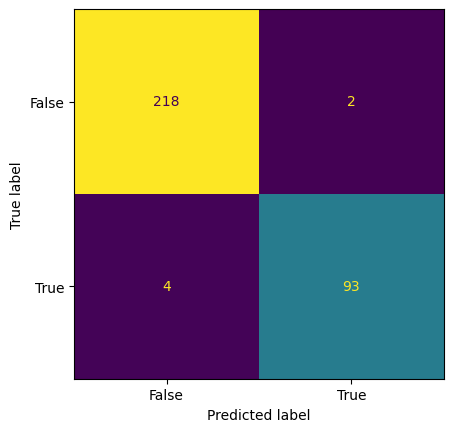

In [107]:
#Let's make it a little more visually appealing so we know what we are looking at 
#This function allows us to include labels which will help us determine number of true positives, fp, tn, and fn
metrics.ConfusionMatrixDisplay.from_predictions(final_model.target,final_model.pred, display_labels = [False, True], colorbar=False)
#Ignore the color, as there is so much variance in this example it really is not telling us anything


In [108]:
#What if we want to adjust the threshold to produce a new set of evaluation metrics
#Let's build a function so we can make the threshold whatever we want, not just the default 50%
def adjust_thres(x,y,z):
  #x=pred_probablities, y=threshold, z=test_outcome
  thres = (np.where(x > y, 1,0))
  #np.where is essentially a condensed if else statement. The first argument is the condition, then the true output, then the false output
  return metrics.ConfusionMatrixDisplay.from_predictions(z,thres, display_labels = [False, True], colorbar=False)


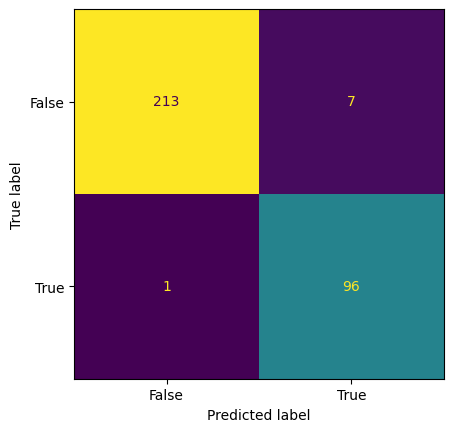

In [109]:
# Give it a try with a threshold of .35
adjust_thres(final_model.pos_prob,.35,final_model.target)
#What's the difference? Try different percents now, what happens?


Text(0.5, 0, 'False Positive Rate')

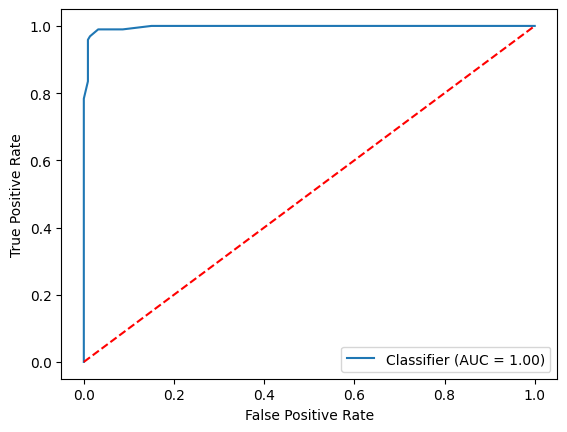

In [110]:
#Now let's use our model to obtain an ROC Curve and the AUC
metrics.RocCurveDisplay.from_predictions(final_model.target, final_model.pos_prob)
#Set labels and midline...
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


In [111]:
#Let's extract the specific AUC value now
metrics.roc_auc_score(final_model.target, final_model.pos_prob) #Looks good!


0.9968369259606373

In [112]:
#Determine the log loss
metrics.log_loss(final_model.target, final_model.pos_prob)


0.0719111741354128

In [113]:
#Get the F1 Score
metrics.f1_score(final_model.target, final_model.pred)


0.96875

In [114]:
#Extra metrics
print(metrics.classification_report(final_model.target, final_model.pred)) #Nice Work!


              precision    recall  f1-score   support

       False       0.98      0.99      0.99       220
        True       0.98      0.96      0.97        97

    accuracy                           0.98       317
   macro avg       0.98      0.97      0.98       317
weighted avg       0.98      0.98      0.98       317



## Fairness assessment


## Conclusions